
Main information

[ALGORITHM] SOFM

[OPTION] verbose = True
[OPTION] epoch_end_signal = on_epoch_end
[OPTION] show_epoch = 20
[OPTION] shuffle_data = False
[OPTION] step = 0.5
[OPTION] train_end_signal = None
[OPTION] n_inputs = 2
[OPTION] distance = euclid
[OPTION] features_grid = [5, 5, 1]
[OPTION] grid_type = rect
[OPTION] learning_radius = 1
[OPTION] n_outputs = 25
[OPTION] reduce_radius_after = 100
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] std = 1
[OPTION] weight = Normal(mean=0, std=0.01)


Start training

[TRAINING DATA] shapes: (3840, 2)
[TRAINING] Total epochs: 10

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |    0.091448 |           - |       2 sec |
|          10 |    0.088512 |           - |       2 sec |
---------------------------------------------------------



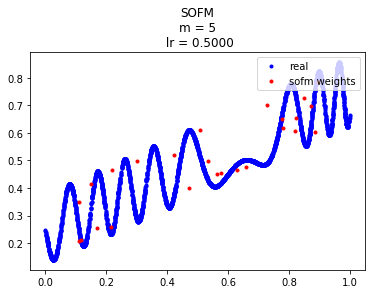

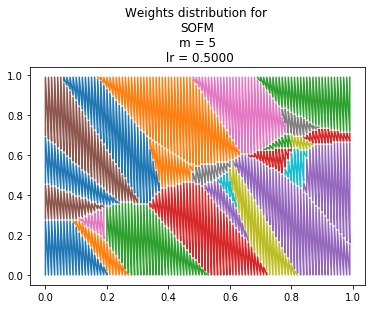


Main information

[ALGORITHM] SOFM

[OPTION] verbose = True
[OPTION] epoch_end_signal = on_epoch_end
[OPTION] show_epoch = 20
[OPTION] shuffle_data = False
[OPTION] step = 0.5
[OPTION] train_end_signal = None
[OPTION] n_inputs = 2
[OPTION] distance = euclid
[OPTION] features_grid = [10, 10, 1]
[OPTION] grid_type = rect
[OPTION] learning_radius = 1
[OPTION] n_outputs = 100
[OPTION] reduce_radius_after = 100
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] std = 1
[OPTION] weight = Normal(mean=0, std=0.01)


Start training

[TRAINING DATA] shapes: (3840, 2)
[TRAINING] Total epochs: 10

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |    0.055766 |           - |       2 sec |
|          10 |    0.043512 |           - |       2 sec |
---------------------------------------------------------



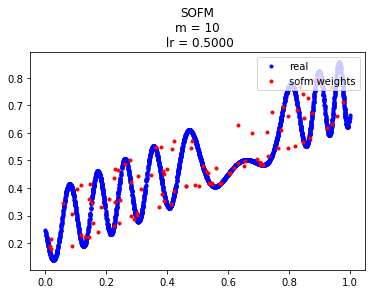

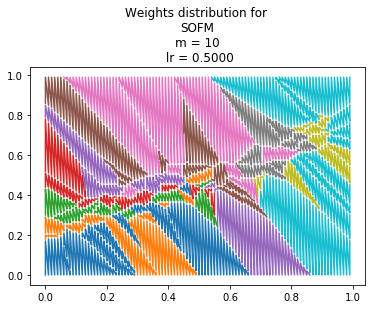


Main information

[ALGORITHM] SOFM

[OPTION] verbose = True
[OPTION] epoch_end_signal = on_epoch_end
[OPTION] show_epoch = 20
[OPTION] shuffle_data = False
[OPTION] step = 0.5
[OPTION] train_end_signal = None
[OPTION] n_inputs = 2
[OPTION] distance = euclid
[OPTION] features_grid = [15, 15, 1]
[OPTION] grid_type = rect
[OPTION] learning_radius = 1
[OPTION] n_outputs = 225
[OPTION] reduce_radius_after = 100
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] std = 1
[OPTION] weight = Normal(mean=0, std=0.01)


Start training

[TRAINING DATA] shapes: (3840, 2)
[TRAINING] Total epochs: 10

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |    0.052776 |           - |       2 sec |
|          10 |    0.028297 |           - |       3 sec |
---------------------------------------------------------



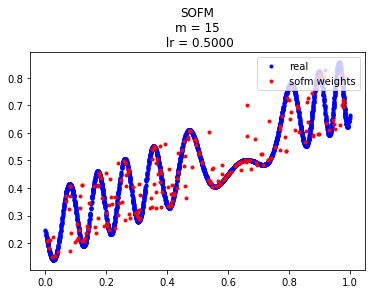

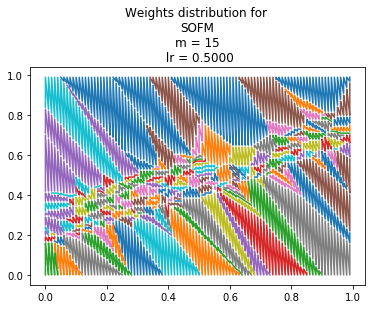

In [3]:
#2.1 предсказание с помощью СОК

from neupy import algorithms
from matplotlib import pyplot as plt
from neupy.exceptions import StopTraining
import numpy as np
import sys
sys.path.append("../..")

from LABS.ZeroLab import E_Function as dataset5


def on_epoch_end(model):
    if model.train_errors.last() < goal_loss:
        raise StopTraining("Training has been interrupted")


def get_index(poss_code):
    for i in range(poss_code.__len__()):
        if poss_code[i] == 1:
            return i


if __name__ == '__main__':

    epochs = 100
    step = 0.5
    train_size = 4000

    goal_loss = 0.01

    (x_train, y_train), (x_test, y_test) = dataset5.load_data(train_size=train_size, mode=1)

    data = zip(x_train, y_train)

    for m in [5,10,15]:
        sofm = algorithms.SOFM(
            n_inputs=2,
            n_outputs=m * m,

            step=step,
            show_epoch=20,

            verbose=True,

            learning_radius=1,
            features_grid=(m, m, 1),

            epoch_end_signal=on_epoch_end

        )

        sofm.train(data, epochs=10)

        plt.plot(x_train, y_train, 'b.', label='real')
        plt.plot(sofm.weight[0], sofm.weight[1], 'r.', label='sofm weights')

        plt.legend(loc='upper right')
        plt.title("SOFM\nm = %.d\n lr = %.4f" % (m, step))

        plt.show()
        plt.close()

        weights_plt_x = []
        weights_plt_y = []

        for i in range(0, m * m):
            weights_plt_x.append(np.empty(0))
            weights_plt_y.append(np.empty(0))

        for x in np.arange(0.0, 1.0, step=0.01):
            for y in np.arange(0.0, 1.0, step=0.01):
                i = get_index(sofm.predict(np.array([x, y]))[0])

                weights_plt_x[i] = np.append(weights_plt_x[i], x)
                weights_plt_y[i] = np.append(weights_plt_y[i], y)

        for i in range(0, m * m):
            plt.plot(weights_plt_x[i], weights_plt_y[i])
        plt.title("Weights distribution for \nSOFM\nm = %.d\n lr = %.4f" % (m, step))
        plt.show()
        plt.close()
